In [1]:
# ** Covert Channel Detection Using Naive Bayes **

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Two classes exist in this dataset: 1 and 0
# 1 = Covert packet
# 0 = Normal packet
dataset = pd.read_excel('Final Covert_tcp TCP SEQ Dataset.xlsx')
dataset.head(10)

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.checksum,tcp.checksum.dec,tcp.flags.syn,class
0,1275068416,1275068416,0,0x000082d0,33488,1,1
1,1862270976,1862270976,0,0x0000cbb8,52152,1,1
2,1912602624,1912602624,0,0x00002fd4,12244,1,1
3,1694498816,1694498816,0,0x000021b3,8627,1,1
4,1828716544,1828716544,0,0x000071c9,29129,1,1
5,536870912,536870912,0,0x000065bc,26044,1,1
6,1761607680,1761607680,0,0x000053d2,21458,1,1
7,1879048192,1879048192,0,0x000062b9,25273,1,1
8,1929379840,1929379840,0,0x00004cb3,19635,1,1
9,1962934272,1962934272,0,0x000015b4,5556,1,1


In [4]:
dataset.tail()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.checksum,tcp.checksum.dec,tcp.flags.syn,class
100393,3950200838,3950200838,157214632,0x0000acf4,44276,0,0
100394,157214632,157224852,3950200838,0x0000d4e0,54496,0,0
100395,3950200838,3950200838,157224852,0x0000acf4,44276,0,0
100396,157224852,157230692,3950200838,0x0000c3c4,50116,0,0
100397,3950200838,3950200838,157230692,0x0000acf4,44276,0,0


In [5]:
# Check if there are any nulls
dataset.isnull().sum(axis=0)
# No nulls detected

tcp.seq             0
tcp.nxtseq          0
tcp.ack             0
tcp.checksum        0
tcp.checksum.dec    0
tcp.flags.syn       0
class               0
dtype: int64

In [6]:
# Count the different types of packets
total_covert_packets = dataset [ dataset ['class'] == 1 ]
total_normal_packets = dataset [ dataset ['class'] == 0 ]
print(f'Total covert packets: {len(total_covert_packets)}')
print(f'Total normal packets: {len(total_normal_packets)}')

Total covert packets: 50199
Total normal packets: 50199


In [7]:
# Total packets in the dataset
print(len(dataset))

100398


In [8]:
# Right now the dataset contains hexadecimal values
# These values are the ip.ip and ip.checksum values
# These must be dropped 
dataset = dataset.drop(['tcp.checksum'], axis=1)

In [9]:
dataset.head()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.checksum.dec,tcp.flags.syn,class
0,1275068416,1275068416,0,33488,1,1
1,1862270976,1862270976,0,52152,1,1
2,1912602624,1912602624,0,12244,1,1
3,1694498816,1694498816,0,8627,1,1
4,1828716544,1828716544,0,29129,1,1


In [10]:
dataset.tail()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.checksum.dec,tcp.flags.syn,class
100393,3950200838,3950200838,157214632,44276,0,0
100394,157214632,157224852,3950200838,54496,0,0
100395,3950200838,3950200838,157224852,44276,0,0
100396,157224852,157230692,3950200838,50116,0,0
100397,3950200838,3950200838,157230692,44276,0,0


In [11]:
# Ready for data visualisation
import seaborn as sns

C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


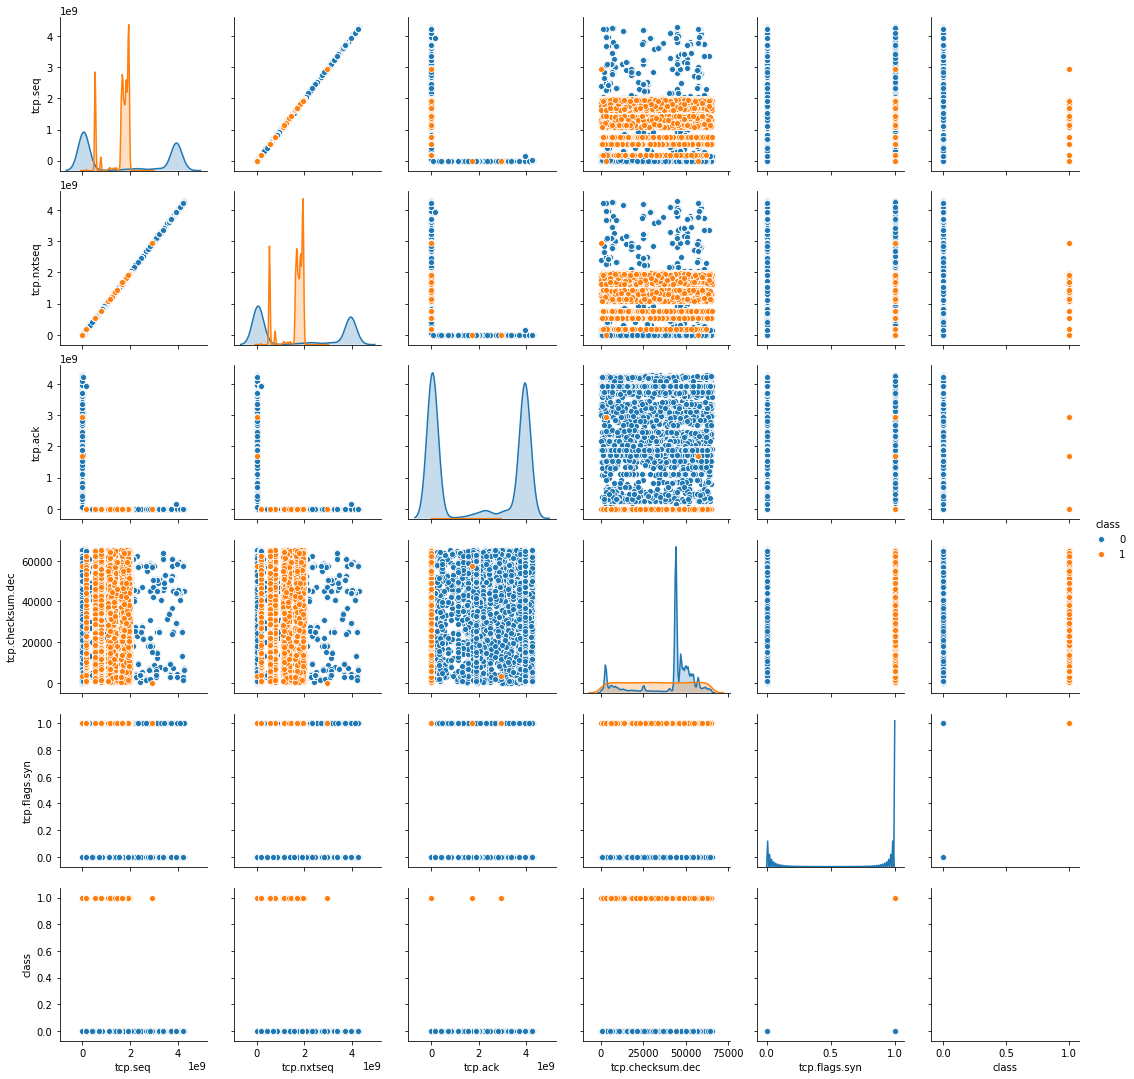

In [12]:
sns.pairplot(dataset, hue='class')

In [13]:
# Set the independent and dependent variables
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [14]:
# View the independent variables
X.head()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.checksum.dec,tcp.flags.syn
0,1275068416,1275068416,0,33488,1
1,1862270976,1862270976,0,52152,1
2,1912602624,1912602624,0,12244,1
3,1694498816,1694498816,0,8627,1
4,1828716544,1828716544,0,29129,1


In [15]:
# Class
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [16]:
# Split the dataset into training and testing sets
# Stratify it so there is equal number of packets in the two classes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [17]:
# Check the size the datasets
print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(75298, 5)
(25100, 5)

(75298,)
(25100,)


In [18]:
# Scale the variables for faster computation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Use Naive Bayes to fit
from sklearn.naive_bayes import GaussianNB

In [20]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
# Predict the test data
y_predict = classifier.predict(X_test)
print(y_predict)

[0 1 0 ... 1 1 1]


In [22]:
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model score
score = classifier.score(X_test, y_test)
print(score, '%')

# Accuracy using the accuracy_score function from the sklearn.metrics
score = accuracy_score(y_test, y_predict)
print(score, '%')

# The quality of the predictions being made
report = classification_report(y_test, y_predict)
print(report)

# The confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

0.9986852589641434 %
0.9986852589641434 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12550
           1       1.00      1.00      1.00     12550

    accuracy                           1.00     25100
   macro avg       1.00      1.00      1.00     25100
weighted avg       1.00      1.00      1.00     25100

[[12518    32]
 [    1 12549]]


In [23]:
# Accuracy can be misleading
# Try the KFold cross validation
from sklearn.model_selection import cross_validate
scores = cross_validate(classifier, X, y,cv=10, return_train_score=True)
print(f'KFold cross validation scores: {scores}')
avg = np.average(scores['test_score'])
print(f'Average score is {avg}')
print()

KFold cross validation scores: {'fit_time': array([0.01691461, 0.01795077, 0.01795173, 0.01695514, 0.01695538,
       0.01650572, 0.01695585, 0.0179882 , 0.01787734, 0.01697731]), 'score_time': array([0.00201845, 0.00099754, 0.00099778, 0.00199437, 0.0020175 ,
       0.00201702, 0.00201845, 0.0009973 , 0.00099683, 0.00099754]), 'test_score': array([0.97549801, 0.9624502 , 0.95069721, 0.96613546, 0.99960159,
       0.99133466, 0.96533865, 0.96125498, 0.97988048, 0.94979079]), 'train_score': array([0.96853627, 0.96998606, 0.9712477 , 0.96954337, 0.99849488,
       0.96669913, 0.9695323 , 0.97004139, 0.96804931, 0.97130367])}
Average score is 0.9701982030038842



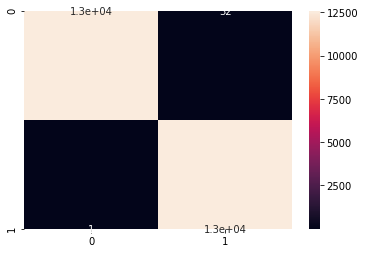

In [24]:
sns.heatmap(cm, annot=True)

AUC is 0.9986852494404851


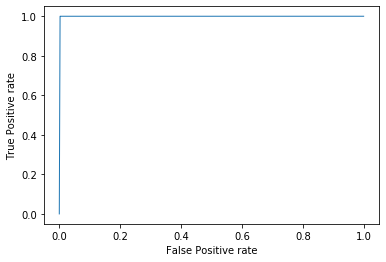

In [25]:
# Draw the ROC + AUC using matplotlib
from sklearn.metrics import roc_curve, roc_auc_score

# Create the prediction probability which will be used to draw the ROC curve
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Customise the ROC curve
plt.plot(fpr, tpr, linewidth=1)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
#plt.plot([0, 1], [0, 1], color='black', linestyle='--')
print(f'AUC is {auc}')

In [26]:
# Covert packet 
observation = [[1275068416, 1275068416, 0, 33488, 1]]
scaled_observation = scaler.transform(observation)
print(scaled_observation)
print(classifier.predict(scaled_observation))

[[-0.29492978 -0.29493162 -0.59496897 -0.1675201   0.9940415 ]]
[1]


In [27]:
# Save the best model
import pickle
pickle.dump(classifier, open('covert_tcp_seq_nb_model', 'wb'))
trained_model = pickle.load(open('covert_tcp_seq_nb_model', 'rb'))
result_val = trained_model.score(X_train, y_train)
result_test = trained_model.score(X_test, y_test)
print(result_val)
print(result_test)

# Save the scaler too
from sklearn.externals.joblib import dump, load
dump(scaler, 'scaler_covert_tcp_seq_nb_model.bin', compress=True)
scaler_loaded = load('scaler_covert_tcp_seq_nb_model.bin')

0.9984196127387182
0.9986852589641434


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
